---

# Notebook Example

Import some matlab files and showcase jupyter notebooks a little bit.

---


### The underlying experiment design:

<img width="500" src="res/sternberg.svg">

### Links:

Git Repo: [https://github.com/eegdigits/digits](https://github.com/eegdigits/digits)

---

---

### 0. Meta

set some useful notebook **preferences**

---

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


and **import** necessary classes:

In [2]:
# digits related code
from digits.data import matimport

# system libraries
import numpy as np
from os import path
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ipywidgets import interact

---
## 1. Load a session from a .mat file

---

In [3]:
dataroot='../../data/thomas/artcorr/'
importer = matimport.Importer(dataroot=dataroot)

In [4]:
session = importer.get_session('3130','07')

Attached to the `ds` object with the importer are merged samples and targets pandas dataframes.

Let's have a look at the datasets with pandas' built-in `head()` and `info()`.

In [5]:
session.ds.samples.head()

channel                                   Fp1                        \
sample                                 t_0000     t_0001     t_0002   
subject session trial presentation                                    
3130    07      1     0             -2.199408 -11.372331 -16.070766   
                2     1              6.922043  17.709455  20.236748   
                      2            -13.506921 -13.129282 -10.809486   
                      3              8.786225   5.984751  -4.811879   
                      4              7.323746   5.799368   4.533528   

channel                                                                       \
sample                                 t_0003    t_0004    t_0005     t_0006   
subject session trial presentation                                             
3130    07      1     0            -14.695371 -9.129260 -2.694571   0.263796   
                2     1             13.797105  5.446127  2.178019   5.232705   
                      2             -7.684739 -5.506932 -6.850014 -12.092342   
                      3            -11.820303 -5.622183  7.318918  13.128113   
                      4              2.117033 -2.018635 -2.361655   6.532298   

channel                                                                ...     \
sample                                 t_0007     t_0008     t_0009    ...      
subject session trial presentation                                     ...      
3130    07      1     0             -1.620199  -3.608417  -1.085591    ...      
                2     1              8.426273   3.744705  -6.052773    ...      
                      2            -15.964139 -13.909304 -10.121537    ...      
                      3              9.028621   4.560517   5.954663    ...      
                      4             20.077507  26.531620  20.627394    ...      

channel                                   A1                                \
sample                                t_1391    t_1392    t_1393    t_1394   
subject session trial presentation                                           
3130    07      1     0             1.590091  0.820325  0.680883  0.506429   
                2     1             1.899544  2.412834  2.707548  2.869648   
                      2            -0.529209 -0.390416 -0.291588 -0.651367   
                      3             1.785268  0.537896 -0.279434 -0.528840   
                      4             0.799495  0.513662  0.841119  1.268447   

channel                                                                     \
sample                                t_1395    t_1396    t_1397    t_1398   
subject session trial presentation                                           
3130    07      1     0            -1.115030 -3.773515 -4.818643 -2.657066   
                2     1             2.709613  1.724616 -0.164369 -2.041430   
                      2            -1.528766 -2.206052 -2.181978 -1.826331   
                      3            -0.710881 -0.673643  0.195519  1.432084   
                      4             1.299496  0.676402 -0.693614 -2.292967   

channel                                                 
sample                                t_1399    t_1400  
subject session trial presentation                      
3130    07      1     0             0.185970 -0.516612  
                2     1            -2.767964 -2.308918  
                      2            -1.528060 -1.073141  
                      3             1.754486  1.093973  
                      4            -3.059640 -2.621352  

[5 rows x 89664 columns]

In [6]:
session.ds.targets.head()

label
subject session trial presentation       
3130    07      1     0                 3
                2     1                 6
                      2                 4
                      3                 3
                      4                 9

In [7]:
session.ds.targets.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 668 entries, (3130, 07, 1, 0) to (3130, 07, 186, 667)
Data columns (total 1 columns):
label    668 non-null uint8
dtypes: uint8(1)
memory usage: 5.9+ KB


Things to notice:
    
- The samples are flattened with a hierarchical index:

  + on the top level are channel/electrode names
  + on the lower level we've got the sampling points (-200 to 1200 with index 0 to 1400)
  + indices are called levels and are all strings
    
- datatype is float32
- the row index is also a hierarchical with:
    + subject id ( all the samples of a certain subject )
    + session id ( recordings of a single day )
    + trial id ( blocks with sizes 2,4 and 6 of digit presentations)
    + presentation id (each individual digit)
    

---

## 2. Let's explore the session dataset a bit:

---

We can check if the digits are evenly distributed and plot a histogram.

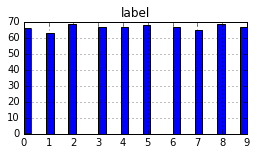

In [8]:
rcParams['figure.figsize'] = (4,2)
_ = session.ds.targets.hist(bins=30)

With `interact()` we can use widgets to control a graph output.

To get a visual impression of the data a simple call to subplot and a slider provided by ipywidgets' `interact` is sufficient:


In [17]:
rcParams['figure.figsize'] = (20, 40)

In [14]:
samples = session.ds.samples
targets = session.ds.targets
channels = np.unique(samples.columns.get_level_values('channel'))

def show_window(presentation=0):
    print("Target Digit = {0}".format(targets.iloc[presentation].values[0]))
    f, axes = plt.subplots(len(channels), sharex=True, sharey=True)
    for ix,channel in enumerate(channels):
        axes[ix].get_yaxis().set_ticks([])
        axes[ix].set_ylabel(channel)
        axes[ix].plot(samples.iloc[presentation][channel].values)
    f.subplots_adjust(hspace=0)
    plt.show()

In [15]:
?interact

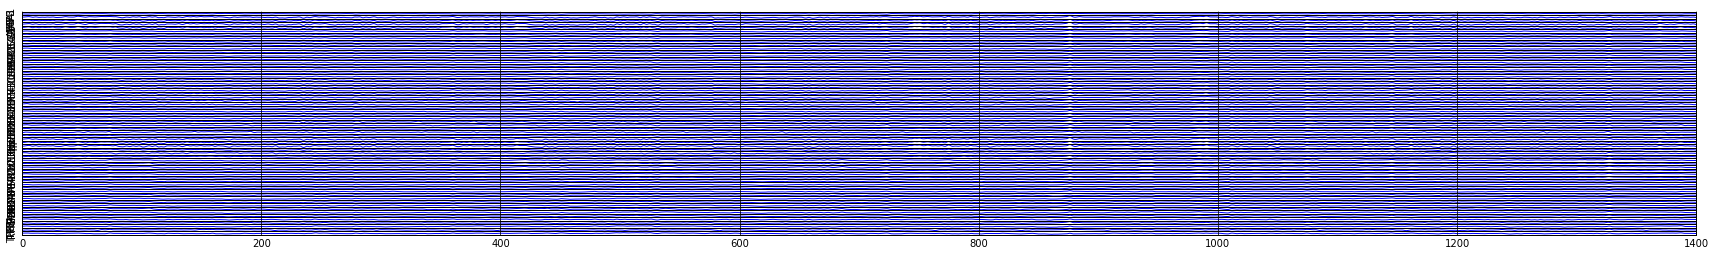

In [16]:
_ = interact(show_window, presentation=(0,642,1))

---
Reset figure size and plot a single time series.

In [18]:
rcParams['figure.figsize'] = (30,4)

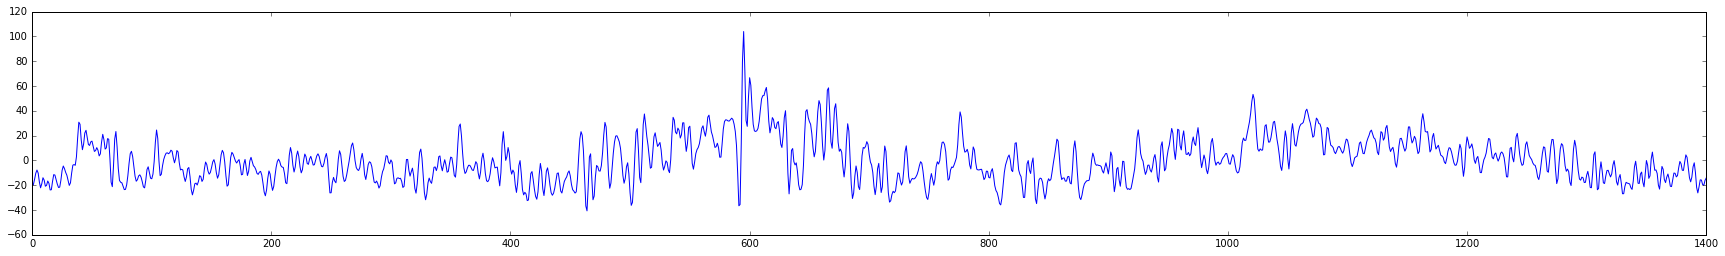

In [19]:
plt.plot(samples.loc[('3130','07','2','2')]['Fpz'].values)